In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
m = 2.0
b = 0.5
x = np.linspace(0,4,100)
y = m * x + b + np.random.randn(*x.shape) + 0.25

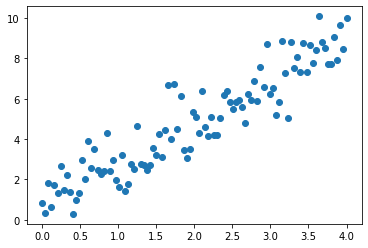

In [3]:
plt.scatter(x,y)

In [4]:
class Model:
    def __init__(self):
        self.weight = tf.Variable(10.0)
        self.bias   = tf.Variable(10.0)
    
    def __call__(self,x):
        return self.weight * x + self.bias

In [5]:
def calculate_loss(y_actual, y_output):
    return tf.reduce_mean(tf.square(y_actual - y_output))

In [6]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as gt:
        y_output = model(x)
        loss = calculate_loss(y,y_output)
    new_weight, new_bias = gt.gradient(loss, [model.weight, model.bias])
    model.weight.assign_sub(new_weight * learning_rate)
    model.bias.assign_sub(new_bias * learning_rate)

In [8]:
model = Model()
epochs = 100
learning_rate = 0.15
for epoch in range(epochs):
    y_output = model(x)
    loss = calculate_loss(y,y_output)
    print(f"Epoch; {epoch}, loss: {loss.numpy()}")
    train(model, x, y, learning_rate)

Epoch; 0, loss: 720.7357788085938
Epoch; 1, loss: 511.9317321777344
Epoch; 2, loss: 363.8862609863281
Epoch; 3, loss: 258.8954772949219
Epoch; 4, loss: 184.4167938232422
Epoch; 5, loss: 131.56454467773438
Epoch; 6, loss: 94.04289245605469
Epoch; 7, loss: 67.39102935791016
Epoch; 8, loss: 48.447898864746094
Epoch; 9, loss: 34.97328567504883
Epoch; 10, loss: 25.379344940185547
Epoch; 11, loss: 18.540512084960938
Epoch; 12, loss: 13.65869140625
Epoch; 13, loss: 10.167890548706055
Epoch; 14, loss: 7.666586875915527
Epoch; 15, loss: 5.869839668273926
Epoch; 16, loss: 4.575353145599365
Epoch; 17, loss: 3.6394262313842773
Epoch; 18, loss: 2.9599127769470215
Epoch; 19, loss: 2.4641501903533936
Epoch; 20, loss: 2.100397825241089
Epoch; 21, loss: 1.8317673206329346
Epoch; 22, loss: 1.631922960281372
Epoch; 23, loss: 1.482031226158142
Epoch; 24, loss: 1.3685928583145142
Epoch; 25, loss: 1.2819082736968994
Epoch; 26, loss: 1.2149882316589355
Epoch; 27, loss: 1.1627768278121948
Epoch; 28, loss: 1.1

In [9]:
print(model.weight.numpy())
print(model.bias.numpy())

2.0174642
0.8032105


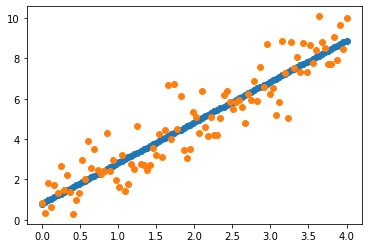

In [11]:
new_x = np.linspace(0,4,100)
new_y = model.weight.numpy() * x + model.bias.numpy()
plt.scatter(new_x, new_y)
plt.scatter(x,y)